# Assignment 2 

#### Author: Omer Ozeren

## [Video Presentation](https://www.youtube.com/watch?v)

### TOPIC :

This week's assignment is to:

1-Load a graph database of your choosing from a text file or other source.  If you take a large network dataset from the web (such as from Stanford Large Network Dataset Collection), please feel free at this point to load just a small subset of the nodes and edges.

2-Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing.  You may either code the functions by hand (to build your intuition and insight), or use functions in an existing package. 

3-Use a visualization tool of your choice (Neo4j, Gephi, etc.) to display information.

4-Please record a short video (~ 5 minutes), and submit a link to the video in advance of our meet-up.

### IMPORT PACKAGES :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


Bad key "text.kerning_factor" on line 4 in
/Users/omerozeren/opt/anaconda3/envs/sps620env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


## DATA :

I have selected Web-Google Network Data set .Nodes represent web pages and directed edges represent hyperlinks between them. The data was released in 2002 by Google as a part of Google Programming Contest. The dataset can be found here: https://snap.stanford.edu/data/web-Google.html

In [2]:
file_path = r'https://raw.githubusercontent.com/omerozeren/DATA620/main/Assignmnet_2/web-Google.txt'
raw_data=pd.read_table(file_path, delim_whitespace=True, skiprows=4, names=['source', 'target'])
raw_data = pd.DataFrame(raw_data)

### Data Describtions:

In [3]:
raw_data.shape

(5105039, 2)

**please feel free at this point to load just a small subset of the nodes and edges.**:

In [4]:
df=raw_data[300:400]

In [5]:
df

,source,target
300,30957,488515
301,30957,494042
302,30957,528391
303,30957,531596
304,30957,565424
...,...,...
395,581609,597621
396,581609,644135
397,581609,858904
398,581609,908276


## Explore Data :

In [6]:
# Creating the Graph object
G = nx.from_pandas_edgelist(df)

In [7]:
# General information on the Graph
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 24
Number of edges: 77
Average degree:   6.4167


In [8]:
# center of the graph
nx.center(G)

[30957, 565424, 581609, 597621, 357310, 423174, 430119, 462435, 472889]

In [9]:
# Number of Nodes
nx.number_of_nodes(G)

24

In [10]:
# Number of Edges
nx.number_of_edges(G)

77

In [11]:
# degree centrality
deg = nx.degree(G)
max(dict(deg).values())

17

In [12]:
# closeness centrality
close = nx.closeness_centrality(G)
close = sorted(close.items(), key = lambda kv: kv[1], reverse = True)
print(list(dict(close).keys())[1:10])

[30957, 565424, 462435, 581609, 357310, 423174, 472889, 597621, 644135]


In [13]:
# betweenness centrality
bet = nx.betweenness_centrality(G)
bet = sorted(bet.items(), key = lambda kv: kv[1], reverse = True)
print(list(dict(bet).keys())[0:3])

[430119, 30957, 565424]


In [14]:
# I will pick the specific Nodes Here!
G = nx.from_pandas_edgelist(df)
nx.shortest_path_length(G, source=597621, target=2937, weight=None)
nx.diameter(G)

3

In [15]:
# we can also not pick any source and target node
nx.shortest_path_length(G, source=None, target=None, weight=None)
nx.diameter(G)

3

## GRAPH PLOT :

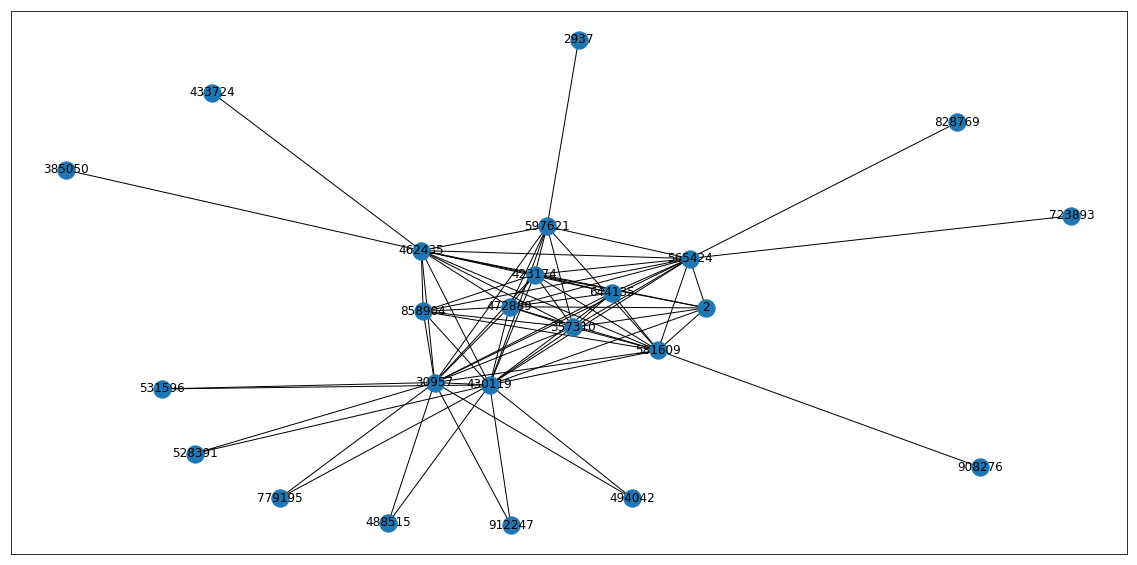

In [16]:
plt.rcParams['figure.figsize'] = [20, 10]
nx.draw_networkx(G)